In [69]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pandas as pd
from datetime import datetime 

In [70]:
import statsmodels.api as sm



In [4]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [7]:
df = pd.read_csv("Downloads/data/Data_distribution.csv")


In [58]:
df.head(10)

,Year,Engineering Diploma Holders,Graduates - Medical*,Graduates - Agriculture*,Graduates - Veterinary*,Graduates - Science*,Graduates - Engineering*,Graduates - Total,Post-graduates - Medical,Post-graduates - Agriculture,Post-graduates - Veterinary,Post-graduates - Science,Post-graduates - Total
0,1971,54056.0,3848,7325,361,99189,19050,129773,105.0,682.0,31.0,10114.0,10932.0
1,1972,59847.0,5127,9092,200,160644,22808,197871,128.0,810.0,7.0,13642.0,14587.0
2,1973,55215.0,5664,8913,371,210716,23093,248757,184.0,959.0,19.0,16036.0,17198.0
3,1974,53901.0,6682,7370,376,215089,19344,248861,238.0,775.0,11.0,17565.0,18589.0
4,1975,55564.0,7301,7958,511,237607,17316,270693,422.0,887.0,4.0,19374.0,20687.0
5,1976,62447.0,8249,8285,489,241319,18385,276727,321.0,911.0,13.0,24557.0,25802.0
6,1977,74319.0,8948,9763,299,265656,19798,304464,385.0,1064.0,46.0,25529.0,27024.0
7,1978,84317.0,10637,9765,399,281693,20113,322607,627.0,871.0,25.0,25751.0,27274.0
8,1979,87275.0,12923,10841,433,286639,21781,332617,924.0,850.0,35.0,25788.0,27597.0
9,1980,90306.0,14809,11375,356,310692,21862,359094,1836.0,546.0,66.0,25651.0,28099.0


In [100]:
df['Year']=df['Year'].apply(lambda x: pd.to_datetime(x,format ="%Y"))

In [101]:
data = df.set_index('Year')


In [102]:
data.index

DatetimeIndex(['1971-01-01', '1972-01-01', '1973-01-01', '1974-01-01',
               '1975-01-01', '1976-01-01', '1977-01-01', '1978-01-01',
               '1979-01-01', '1980-01-01', '1981-01-01', '1982-01-01',
               '1983-01-01', '1984-01-01', '1985-01-01', '1986-01-01',
               '1987-01-01', '1988-01-01', '1989-01-01', '1990-01-01',
               '1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01',
               '1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

In [103]:
#data.index.astype("datetime")

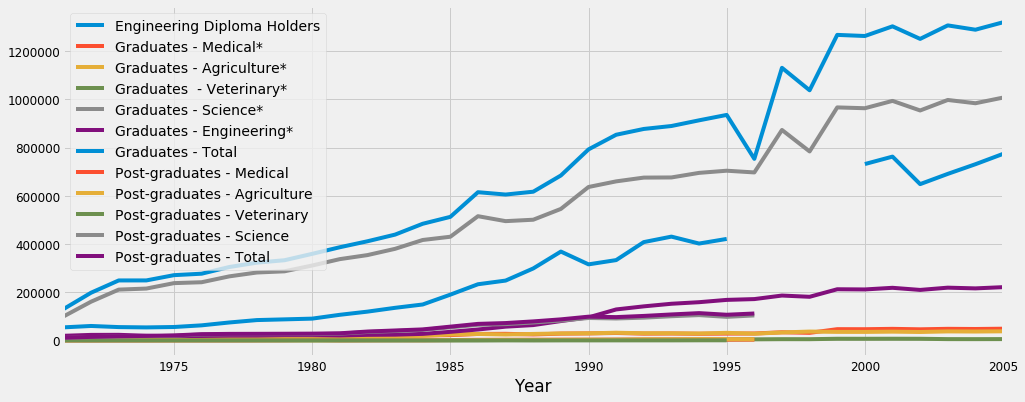

In [106]:
data.plot(figsize=(15, 6))
plt.show()

In [107]:
data.isna().sum()

Engineering Diploma Holders     3
Graduates - Medical*            0
Graduates - Agriculture*        0
Graduates  - Veterinary*        0
Graduates - Science*            0
Graduates - Engineering*        0
Graduates - Total               0
Post-graduates - Medical        8
Post-graduates - Agriculture    8
Post-graduates - Veterinary     9
Post-graduates - Science        8
Post-graduates - Total          8
dtype: int64

In [108]:
data.shape

(35, 12)

In [109]:
data.columns

Index(['Engineering Diploma Holders', 'Graduates - Medical*',
       'Graduates - Agriculture*', 'Graduates  - Veterinary*',
       'Graduates - Science*', 'Graduates - Engineering*', 'Graduates - Total',
       'Post-graduates - Medical', 'Post-graduates - Agriculture',
       'Post-graduates - Veterinary', 'Post-graduates - Science',
       'Post-graduates - Total'],
      dtype='object')

In [110]:
grad=['Graduates - Medical*',
       'Graduates - Agriculture*', 'Graduates  - Veterinary*',
       'Graduates - Science*', 'Graduates - Engineering*', 'Graduates - Total']

In [111]:
graduates=data[grad]

In [112]:
graduates

,Graduates - Medical*,Graduates - Agriculture*,Graduates - Veterinary*,Graduates - Science*,Graduates - Engineering*,Graduates - Total
Year,,,,,,
1971-01-01,3848,7325,361,99189,19050,129773
1972-01-01,5127,9092,200,160644,22808,197871
1973-01-01,5664,8913,371,210716,23093,248757
1974-01-01,6682,7370,376,215089,19344,248861
1975-01-01,7301,7958,511,237607,17316,270693
1976-01-01,8249,8285,489,241319,18385,276727
1977-01-01,8948,9763,299,265656,19798,304464
1978-01-01,10637,9765,399,281693,20113,322607
1979-01-01,12923,10841,433,286639,21781,332617


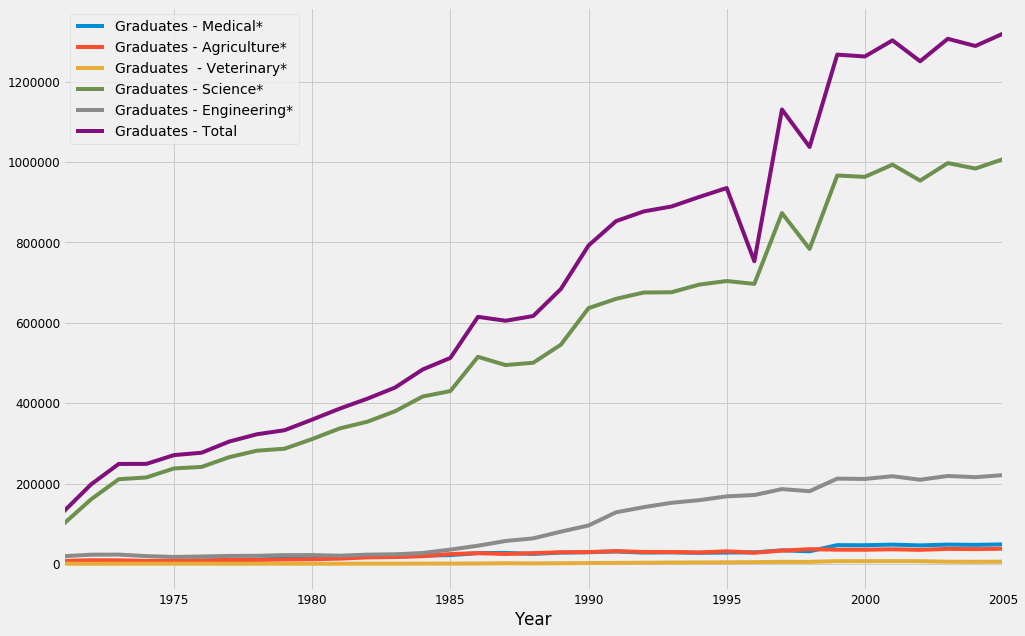

In [113]:
graduates.plot(figsize=(15,10))
plt.show()

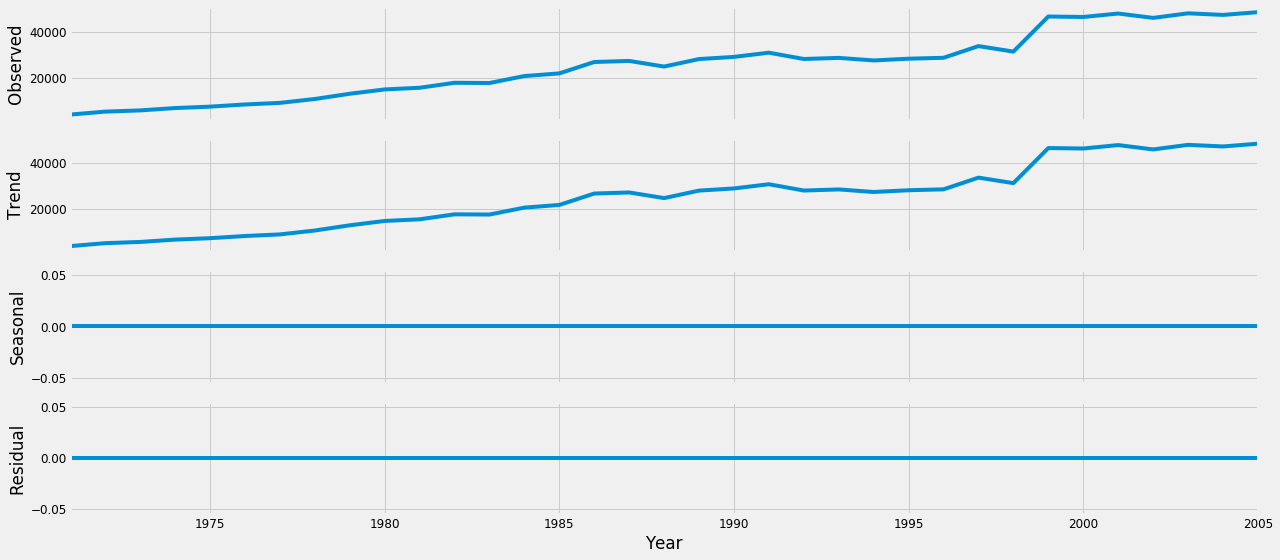

In [121]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(graduates['Graduates - Medical*'], model='additive')
fig = decomposition.plot()
plt.show()

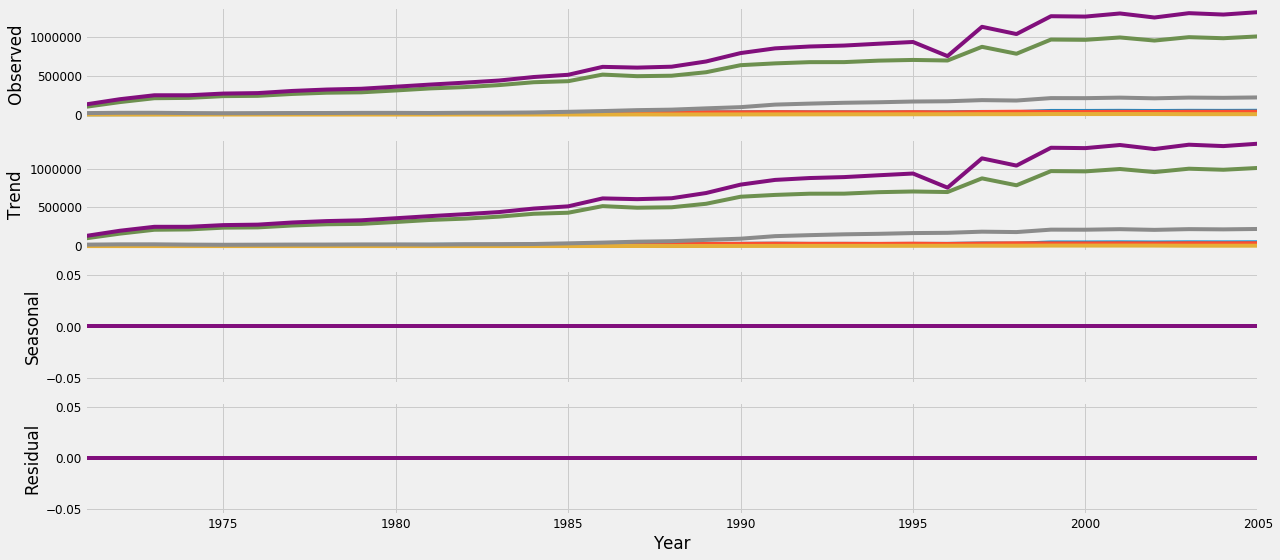

In [120]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(graduates, model='additive')
fig = decomposition.plot()
plt.show()

In [122]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [130]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(graduates['Graduates - Medical*'],order=param,seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            #print("ds")
            results = mod.fit()
            #print("ds")
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:797.6083922553523
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:491.8509270035107
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:485.63120623339006
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:226.87345341869212
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:755.4436705970667
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:458.50807066980843
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:523.9724363701845
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:240.7670566777688
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:630.7347939331952
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:412.83451485404544
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:430.52289480525724
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:203.4793800541981
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:614.4259345219376
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:394.20645131166697
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:432.0631171476646
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:205.05091416811905
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:647.3370346988787
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:433.4663130510298
ARI

# The above output suggests that SARIMAX ARIMA(1, 1, 0)x(1, 1, 0, 12)12  yields the lowest AIC value of 185.27. Therefore we should consider this to be optimal option.

In [170]:
y=graduates['Graduates - Medical*']

In [171]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3501      0.451     -0.777      0.437      -1.234       0.534
ar.S.L12      -0.7504      1.521     -0.493      0.622      -3.732       2.232
sigma2      2.622e+07   3.71e-08   7.06e+14      0.000    2.62e+07    2.62e+07


ValueError: operands could not be broadcast together with shapes (9,) (7,) (9,) 

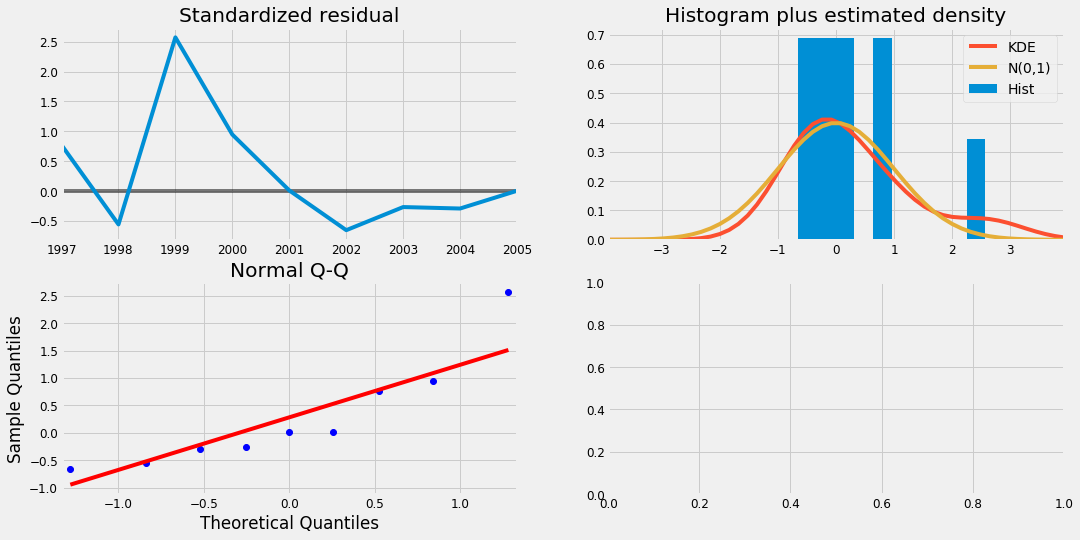

In [172]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

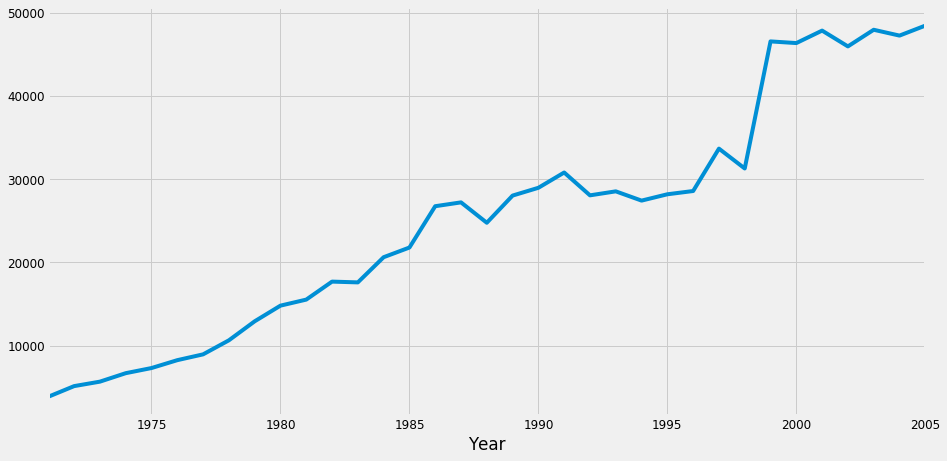

In [196]:
pred = results.get_prediction(start=pd.to_datetime('2005-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1971':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))


In [198]:
pred_ci

,lower Graduates - Medical*,upper Graduates - Medical*
2005-01-01,38429.459911,58502.260975


In [202]:
y_forecasted = pred.predicted_mean
y_truth = y['2005-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1165.51


In [203]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 34.14


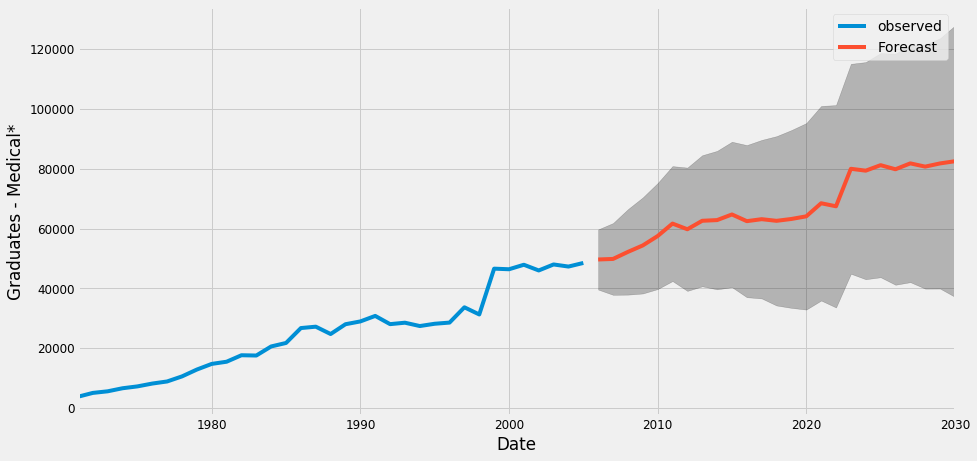

In [217]:
pred_uc = results.get_forecast(steps=25)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Graduates - Medical*')
plt.legend()
plt.show()

In [213]:
final['Graduates - Medical*']=pred_ci

In [305]:
def arima(field):
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(graduates[field],order=param,seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                #print("ds")
                results = mod.fit()
                #print("ds")
                #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue

    y=graduates[field]

    mod = sm.tsa.statespace.SARIMAX(y,
                                    order=(1, 1, 0),
                                    seasonal_order=(1, 1, 0, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
    results = mod.fit()
    print(results.summary().tables[1])


    pred_uc = results.get_forecast(steps=25)
    pred_ci = pred_uc.conf_int()
    ax = y.plot(label='observed', figsize=(14, 7))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Year')
    ax.set_ylabel('Graduates '+field)
    plt.legend()
    plt.show()
    y_forecasted = pred_uc.predicted_mean
    dfa=pd.DataFrame({'Year':y_forecasted.index, 'Predicited_'+field :y_forecasted.values})
    dfa['Year']= dfa['Year'].dt.year
    dfa.set_index('Year',inplace= True)
    return dfa

In [306]:
colum=graduates.columns

In [307]:
colum

Index(['Graduates - Medical*', 'Graduates - Agriculture*',
       'Graduates  - Veterinary*', 'Graduates - Science*',
       'Graduates - Engineering*', 'Graduates - Total'],
      dtype='object')

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0600      0.328      0.183      0.855      -0.584       0.704
ar.S.L12      -0.1310      0.174     -0.753      0.451      -0.472       0.210
sigma2        1.6e+06    1.1e+06      1.452      0.147    -5.6e+05    3.76e+06


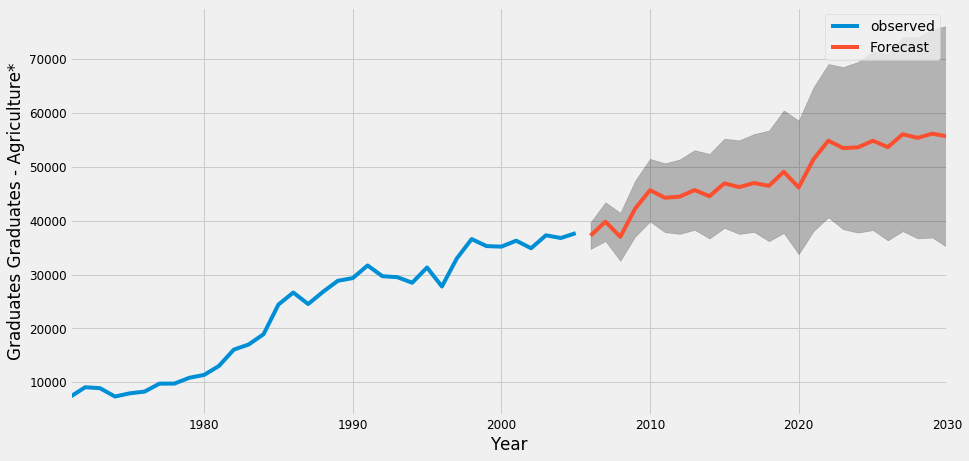

In [308]:
ds=arima("Graduates - Agriculture*")

In [309]:
ds

,Predicited_Graduates - Agriculture*
Year,
2006,37248.071192
2007,39832.445678
2008,37022.321957
2009,42261.500284
2010,45683.347479
2011,44273.573553
2012,44483.508163
2013,45708.608564
2014,44556.451454


'Graduates - Medical*'
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3501      0.451     -0.777      0.437      -1.234       0.534
ar.S.L12      -0.7504      1.521     -0.493      0.622      -3.732       2.232
sigma2      2.622e+07   3.71e-08   7.06e+14      0.000    2.62e+07    2.62e+07


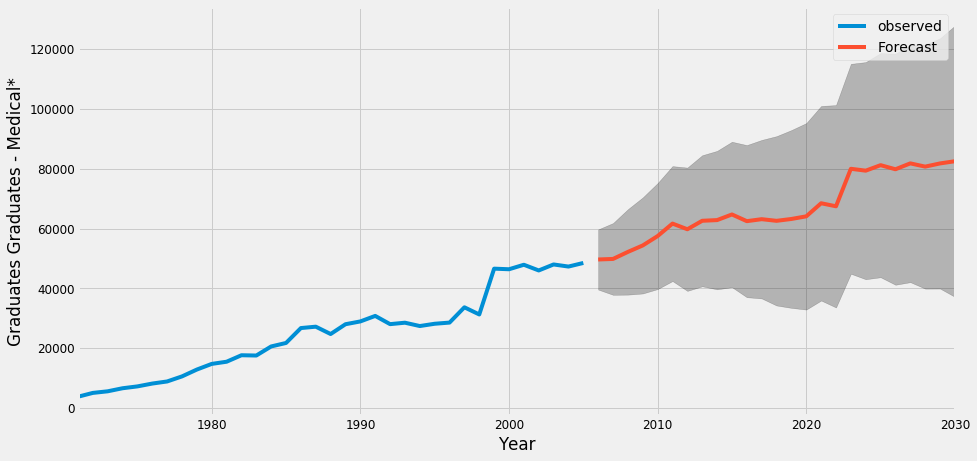

'Graduates - Agriculture*'
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0600      0.328      0.183      0.855      -0.584       0.704
ar.S.L12      -0.1310      0.174     -0.753      0.451      -0.472       0.210
sigma2        1.6e+06    1.1e+06      1.452      0.147    -5.6e+05    3.76e+06


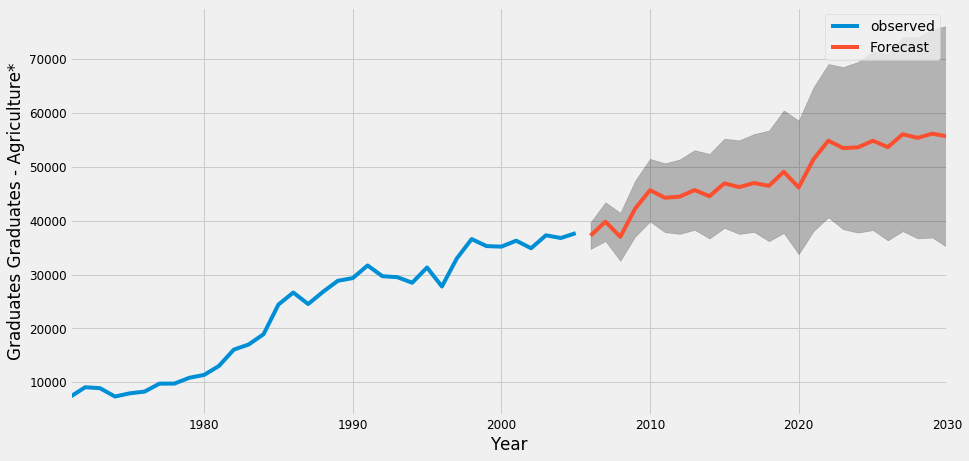

'Graduates  - Veterinary*'
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3245      1.256      0.258      0.796      -2.138       2.787
ar.S.L12      -0.2571      1.191     -0.216      0.829      -2.592       2.078
sigma2       5.36e+05    4.4e+05      1.218      0.223   -3.27e+05     1.4e+06


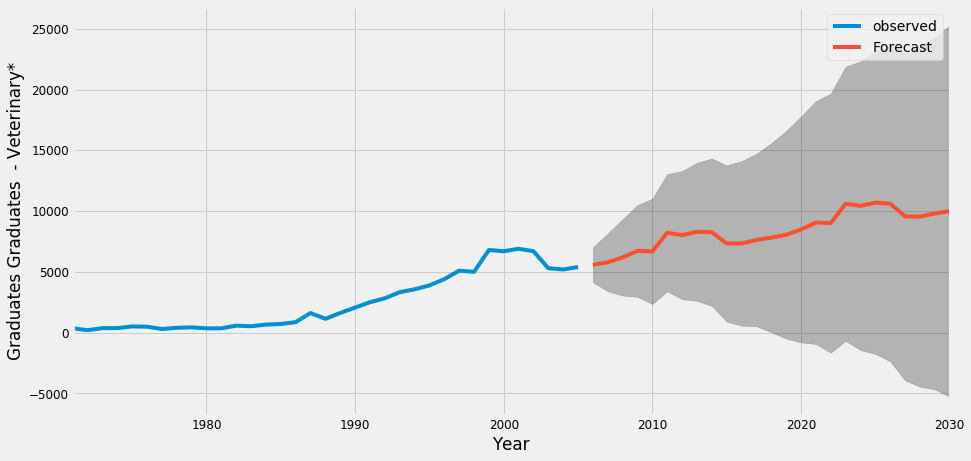

'Graduates - Science*'
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5312      0.383     -1.387      0.165      -1.282       0.220
ar.S.L12      -1.5831      1.018     -1.555      0.120      -3.579       0.412
sigma2      4.445e+09   5.46e-11   8.14e+19      0.000    4.44e+09    4.44e+09


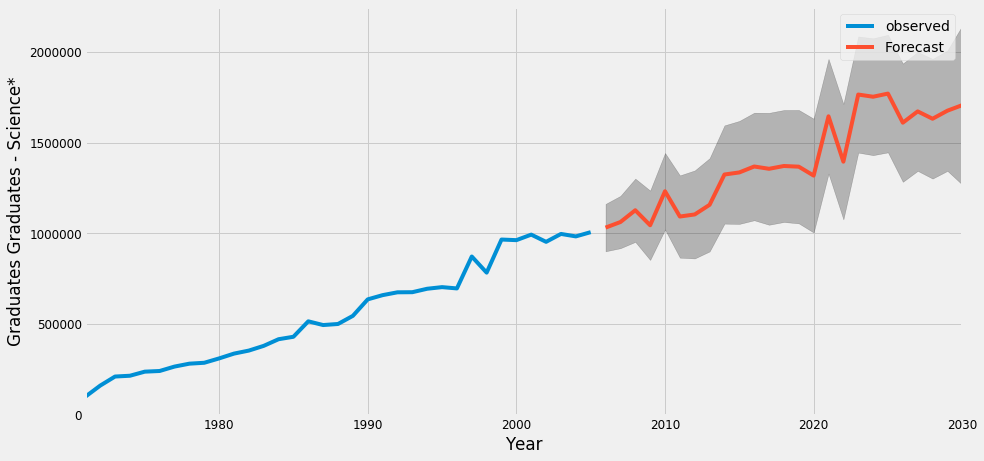

'Graduates - Engineering*'
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2603      0.889     -0.293      0.770      -2.003       1.483
ar.S.L12      -0.6994      0.308     -2.274      0.023      -1.302      -0.097
sigma2      1.433e+08   4.94e-09    2.9e+16      0.000    1.43e+08    1.43e+08


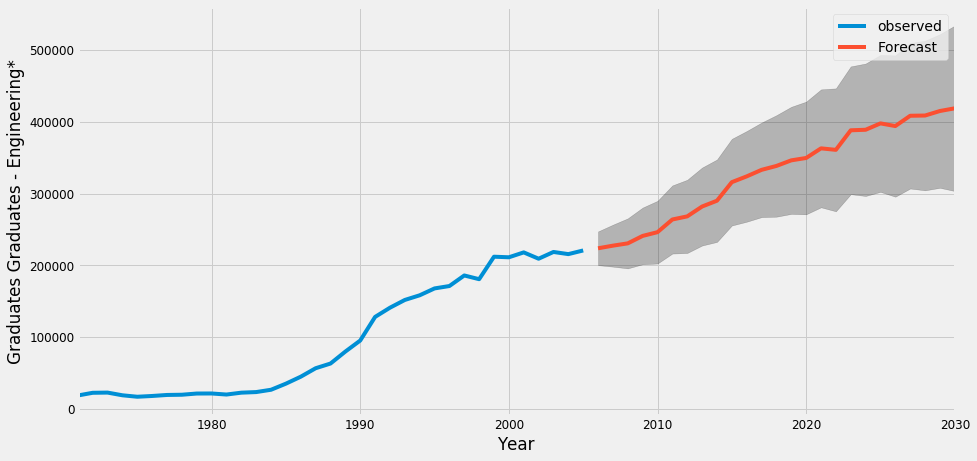

'Graduates - Total'
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6062      0.198     -3.068      0.002      -0.993      -0.219
ar.S.L12      -1.0160      0.867     -1.171      0.241      -2.716       0.684
sigma2      1.008e+10   3.34e-11   3.02e+20      0.000    1.01e+10    1.01e+10


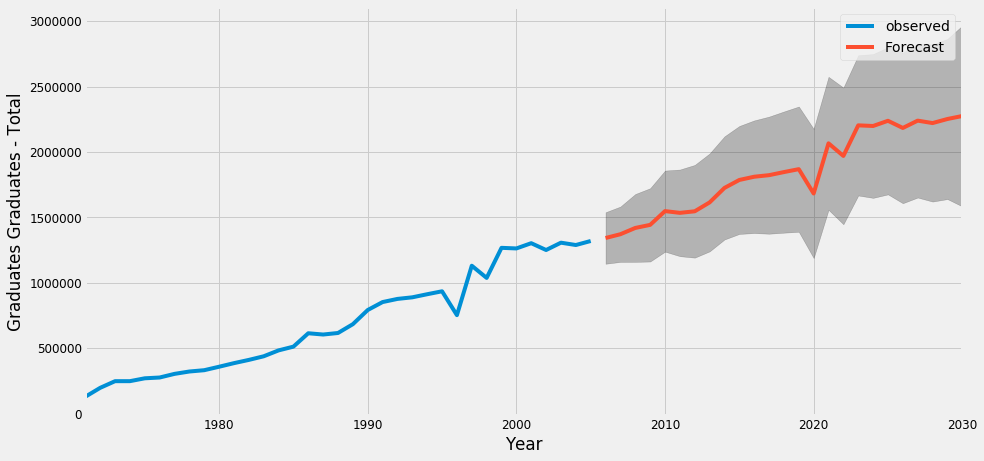

In [310]:
outcome=ds
del(outcome['Predicited_Graduates - Agriculture*'])
for c in colum:
    cm="'"+c+"'"
    print(cm)
    outcome = pd.merge(outcome, arima(c), left_index=True, right_index=True)

In [311]:
outcome.head(30)

,Predicited_Graduates - Medical*,Predicited_Graduates - Agriculture*,Predicited_Graduates - Veterinary*,Predicited_Graduates - Science*,Predicited_Graduates - Engineering*,Predicited_Graduates - Total
Year,,,,,,
2006,49658.509790,37248.071192,5578.799810,1.032473e+06,223912.028593,1.342755e+06
2007,49844.241995,39832.445678,5786.277856,1.063288e+06,227569.776136,1.371654e+06
2008,52192.268786,37022.321957,6195.685148,1.128274e+06,230772.470534,1.419570e+06
2009,54346.844240,42261.500284,6727.152660,1.045418e+06,241134.665349,1.443083e+06
2010,57478.262847,45683.347479,6691.074670,1.233089e+06,246354.569415,1.548263e+06
2011,61641.994184,44273.573553,8220.623616,1.093655e+06,263993.134042,1.534901e+06
2012,59751.813353,44483.508163,8024.132352,1.105166e+06,268330.788043,1.546835e+06
2013,62580.091097,45708.608564,8296.366471,1.158280e+06,282027.060620,1.614651e+06
2014,62808.851781,44556.451454,8262.983864,1.325531e+06,290128.358932,1.725372e+06


In [312]:
outcome.to_csv("Downloads/data/Results.csv")